#Data
##MNIST Handwritten Dataset
###The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from skimage.segmentation import slic
import networkx as nx

In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 33745916.26it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 6145900.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 32289335.84it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2007431.90it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



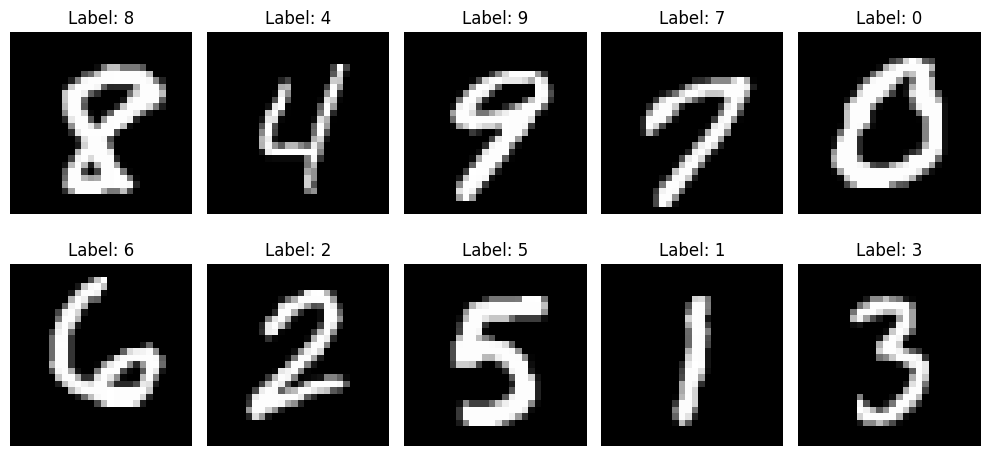

In [3]:
label_images = {}

# Loop through the dataset
for images, labels in train_loader:
    for image, label in zip(images, labels):
        label = label.item()
        if label not in label_images:
            label_images[label] = image
            if len(label_images) == 10:
                break
    if len(label_images) == 10:
        break

# Show one image per label
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

for ax, (label, image) in zip(axes.flatten(), label_images.items()):
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-4-aa58ac90ab0e>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')
<ipython-input-4-aa58ac90ab0e>:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


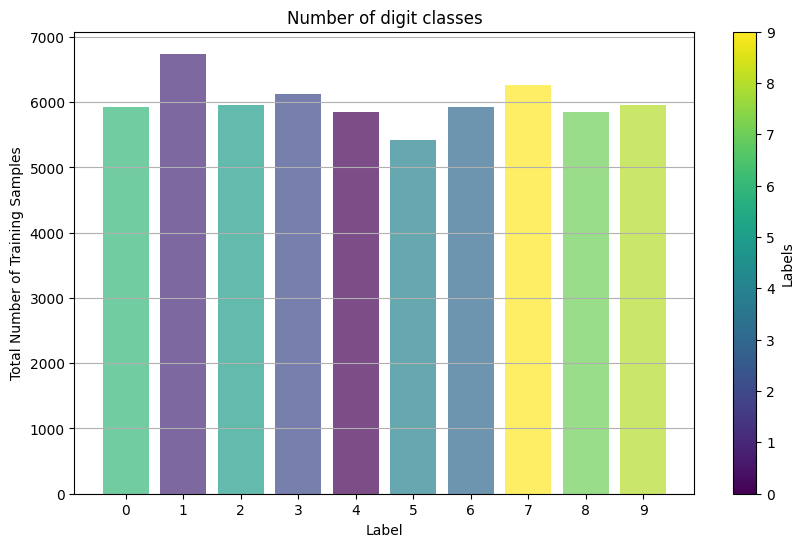

In [4]:
import matplotlib.pyplot as plt
import numpy as np

label_counts = {}
for _, labels in train_loader:
    for label in labels.numpy():
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

# Extract labels
labels = list(label_counts.keys())
counts = list(label_counts.values())

colormap = plt.cm.get_cmap('viridis')

# Plotting with colored bars
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, align='center', alpha=0.7, color=colormap(np.linspace(0, 1, len(labels))))
plt.xlabel('Label')
plt.ylabel('Total Number of Training Samples')
plt.title('Number of digit classes')
plt.xticks(labels)
plt.grid(axis='y')

# Add a color bar legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(labels), vmax=max(labels)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Labels')

plt.show()
